In [1]:
# RQ:选股测试 均线/量BOLL  ，时间格式有问题，暂时没有解决

In [2]:
import time
import datetime
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=300) #准备数据，倒推300天！！！
    yesterday=today-oneday  
    return yesterday
run_start_date = (getYesterday())#开始时间
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=5) #10天
    yesterday=today-oneday  
    return yesterday
open_start_date = (getYesterday())# 输出前N天日期
open_end_date = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "RQ" #本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
elif backend == "TU":
    set_data_backend(TushareDataBackend())
set_start_date(run_start_date)
print ("选股开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
print ("量BOLL选股开始=》")
select(
    lambda : CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=量BOLL选股结束")
print ("均线选股开始=》")
select(
    lambda : CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=均线选股结束")
print ("《结束选股》读取结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

选股开始时间：==》 2018-12-22T12:38:21.349242
量BOLL选股开始=》
lambda : CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)),
[20181221]
No data for 000003.XSHE
No data for 000013.XSHE
No data for 000015.XSHE
No data for 000047.XSHE
No data for 000405.XSHE
No data for 000412.XSHE
No data for 000508.XSHE
No data for 000542.XSHE
No data for 000556.XSHE
No data for 000588.XSHE
No data for 000621.XSHE
No data for 000653.XSHE
No data for 000658.XSHE
No data for 000660.XSHE
No data for 000675.XSHE
No data for 000689.XSHE
No data for 000730.XSHE
20181221 000762.XSHE 西藏矿业
20181221 000813.XSHE 德展健康
20181221 000868.XSHE 安凯客车
No data for 002257.XSHE
20181221 002275.XSHE 桂林三金
20181221 002345.XSHE 潮宏基
20181221 002359.XSHE 北讯集团
20181221 002365.XSHE 永安药业
20181221 002487.XSHE 大金重工
20181221 002490.XSHE 山东墨龙
20181221 002522.XSHE 浙江众成
No data for 002525.XSHE
20181221 002535.XSHE 林州重机
20181221 002544.XSHE 杰赛科技
No data for 002710.XSHE
No data for 002720.XSHE
20181221 002772.XSHE 

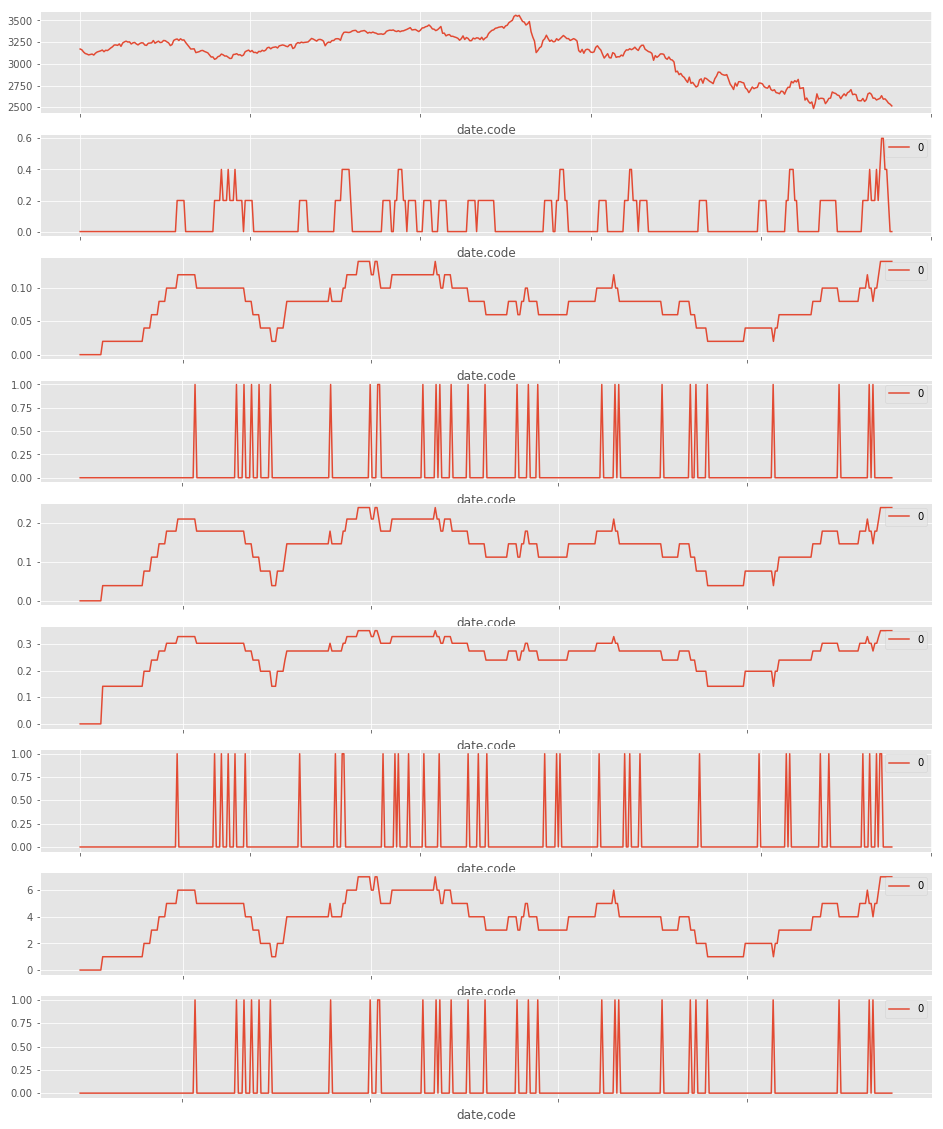

In [31]:
import time
import datetime
import QUANTAXIS as QA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from talib import *

qiehuan = 'zs'     #切换 zs：指数基金 ；gp：股票 ； bk ：板块
daima = '000001' #代码：如果设定 index为指数，stock 为股票
shijian = '1day' #时间：使用 1min/1day 切换分时和日线
start_data = '2017-01-01' #开始——数据：设定数据起始缓冲解决不同轴问题
tu = 910 #前面数字9代表总计9个图表，中间数字竖列，后一位代表图数列

if shijian == '1min': #依据shijian条件切换分时
    start = '2018-11-01 09:31:00' #min画图开始时间
    end = '2018-12-21 09:31:00' #min画图结束时间
elif shijian == '1day': #条件切换日线
    start = '2017-01-09' #day画图开始时间
    end = '2018-12-21 ' #day画图结束时间
    
if qiehuan == 'gp': #切换指数数据
    adv = QA.QA_fetch_stock_day_adv
elif qiehuan == 'zs': #切换股票数据 
    adv = QA.QA_fetch_index_day_adv
elif qiehuan == 'bk': #切换板块
    adv = QA.QA_fetch_stock_block_adv
    
def QA_indicator_TEST(dataframe): #指标通用通达信/同花顺/测试模块
    O = OPEN = dataframe.open #开盘价
    C = CLOSE = dataframe.close #收盘价
    H = HIGH = dataframe.high #最高价
    L = LOW = dataframe.low #最低价
    V = VOL = dataframe.volume #成交量
    CODE = dataframe.index #股票代码
    NAME = dataframe.name #股票名称信息
    MA = QA.MA#(Series, N)       #简单移动平均
    EMA = QA.EMA#(Series, N)      #异同移动平均
    SMA = QA.SMA#(Series, N, M=1) #累积平均
    DIFF = QA.DIFF#(Series, N=1)   #求导数和差分
    HHV = QA.HHV#(Series, N)      #求最高值
    LLV = QA.LLV#(Series, N)      #求最低值
    SUM = QA.SUM#(Series, N)      #求和
    ABS = QA.ABS#(Series)         #绝对值
    MAX = QA.MAX#(A, B)           #求最大
    MIN = QA.MIN#(A, B)           #求最小
    CROSS = QA.CROSS#(A, B)         #交叉上穿
    COUNT = QA.COUNT#(COND, N)      #取值设为常数    
    IF = QA.IF#(COND, V1, V2)    #逻辑判断
    #AND = QA.AND#(COND,V1,V2)   #逻辑判断 和
    #OR = QA.OR#(COND, V1,V2)    #逻辑判断 或
    REF = QA.REF#(Series, N)      #向前引用
    STD = QA.STD#(Series, N)      #估算标准差
    AVEDEV = QA.AVEDEV #(Series, N)   #平均绝对方差
    BBIBOLL = QA.BBIBOLL #(Series, N1, N2, N3, N4, N, M) #多空布林线
    OSC = QA.QA_indicator_OSC#(DataFrame, N, M)
    BBI = QA.QA_indicator_BBI#(DataFrame, N1, N2, N3, N4)
    PBX = QA.QA_indicator_PBX#(DataFrame, N1, N2, N3, N4, N5, N6)
    BOLL = QA.QA_indicator_BOLL#(DataFrame, N)
    ROC = QA.QA_indicator_ROC#(DataFrame, N, M)
    MTM = QA.QA_indicator_MTM#(DataFrame, N, M)
    KDJ = QA.QA_indicator_KDJ#(DataFrame, N=9, M1=3, M2=3)
    MFI = QA.QA_indicator_MFI#(DataFrame, N)
    STR = QA.QA_indicator_ATR#(DataFrame, N)
    SDKJ = QA.QA_indicator_SKDJ#(DataFrame, N, M)
    WR = QA.QA_indicator_WR#(DataFrame, N, N1)
    BIAS = QA.QA_indicator_BIAS#(DataFrame, N1, N2, N3)
    RSI = QA.QA_indicator_RSI#(DataFrame, N1, N2, N3)
    ADTM = QA.QA_indicator_ADTM#(DataFrame, N, M)
    DDI = QA.QA_indicator_DDI#(DataFrame, N, N1, M, M1)
    CCI = QA.QA_indicator_CCI#(DataFrame, N=14)         '''
    #测试条件计算公式
    vmacd = CROSS((2*((MA(L,12) - MA(L,26))-(MA((MA(L,12) - MA(L,26)),9)))), (((MA(L,12) - MA(L,26))-(MA((MA(L,12) - MA(L,26)),9)))/3)) #macd
    vma = CROSS(V, MA(V,7)) & CROSS(V, MA(V,10)) #均线信号
    vboll = CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)) #量BOLL信号
    vkdj = (CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))))
    #cci = CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) & ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14)))),101 & -101)
    
    TEST =  vkdj | vboll | vmacd & vma # &:或；|：和；^: 异；~:反相；<<:左移动；>>:右移动
    return pd.DataFrame(TEST)
zhibiao = QA_indicator_TEST #QA.QA_indicator_KDJ(DataFrame, N=9, M1=3, M2=3) #指标：修改后位名称，设定指标 KDJ/MACD/CCI/BOLL。。。

if shijian == '1min': #分钟条件设定作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao) #data.add_func(QA_indicator_MA,5) 基础指标计算格式
    res1 = QA.MA(res,1000) #1000周期 
    res2 = QA.MA(res,2000) 
    res3 = QA.REF(res,1000)
    res4 = QA.AVEDEV(res,1000)
    res5 = QA.STD(res,1000)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,1000)
    res8 = QA.REF(res,1000)
elif shijian == '1day': #日线条件转换作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao)
    res1 = QA.MA(res,5) #5周期计算
    res2 = QA.MA(res,50) #10周期计算
    res3 = QA.REF(res,50)
    res4 = QA.AVEDEV(res,50)
    res5 = QA.STD(res,50)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,50)
    res8 = QA.REF(res,50)
fig=plt.figure(figsize=(16,20)) #图表长宽量 16，16
plt.style.use('ggplot') #不明白 参考：https://matplotlib.org/gallery/style_sheets/ggplot.html
plt.subplot(tu+1) #绘图：tu+N数列标记，图表0轴显示，后面依次累计
data.select_time(start,end).data.close.plot(use_index=True) #True/False
ax1=plt.subplot(tu+2)
res1.loc[slice(start,end)].plot(use_index=True,ax=ax1)
ax2=plt.subplot(tu+3)
res2.loc[slice(start,end)].plot(use_index=True,ax=ax2)
ax3=plt.subplot(tu+4)
res3.loc[slice(start,end)].plot(use_index=True,ax=ax3)
ax4=plt.subplot(tu+5)
res4.loc[slice(start,end)].plot(use_index=True,ax=ax4)
ax5=plt.subplot(tu+6)
res5.loc[slice(start,end)].plot(use_index=True,ax=ax5)
ax6=plt.subplot(tu+7)
res6.loc[slice(start,end)].plot(use_index=True,ax=ax6)
ax7=plt.subplot(tu+8)
res7.loc[slice(start,end)].plot(use_index=True,ax=ax7)
ax8=plt.subplot(tu+9)
res8.loc[slice(start,end)].plot(use_index=True,ax=ax8)
plt.show()



In [11]:
# TU 选股测试 均线/量BOLL  ，时间格式有问题，暂时没有解决

In [3]:
import time
import datetime
import QUANTAXIS as QA
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=60) #准备数据，倒推100天！！！
    yesterday=today-oneday  
    return yesterday
run_start_date = (getYesterday())#开始时间
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=5) #10天
    yesterday=today-oneday  
    return yesterday
open_start_date = (getYesterday())# 输出前N天日期
open_end_date = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "QA" #本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
if backend == "TU":
    set_data_backend(TushareDataBackend())
elif backend == "QA":
    #QA.QA_fetch_stock_list_adv().code.list() # 获取全市场的股票代码    
    set_data_backend(QA.QA_fetch_stock_day_adv.code.list())    
set_start_date(run_start_date)
print ("选股开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
print ("量BOLL选股开始=》")
select(
    lambda : CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=量BOLL选股结束")
print ("均线选股开始=》")
select(
    lambda : CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10)),
    start_date=(open_start_date), end_date=(open_end_date),
      )
print ("《=均线选股结束")
print ("《结束选股》读取结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

AttributeError: 'function' object has no attribute 'code'

In [ ]:
def ax_ HPYYX(ax2 ,mydf):
CLOSE=mydf['close']
LOW=mydf['low']
HIGH=mydf['high
OPEN=mydf['open'
VOL =mydf['volume']
C=mydf['close']
L=mydf[ 'low' ]
H=mydf['high'
Q=mydf['open'
V=mydf['volume' ]
#df #s Æ'Z ß #tushare dK#. ef,
df=mydf . copy()_
#KDJ pythonA57
#KDJ python HPYYX#bR
def HPYYX():
RSV= (C-LLV(L,9))/(HHV(H,9)-LLV(L,9))*100
FASTK=SMA(RSV,3,1)
RSVI= (HHV(H,9)-c)/ (HHV(H,9)-LLV(L,9))*100.
LC = REE(C,1)
RSI1=SMA(MAX(C-LC,0),13,1)/SMA(ABS(C-LC),13,1)*100
RSI2=SMA(MAX(C-LC,0),6, 1)/SMA(ABS(C-LC),6,1)*100
RSI3=IF(RSI2>50, RSI2*1. 05 , RSI2)
RSV3=(C-LLV(L,54))/ (HHV(H, 54)-LLV(L,54))*100
mydf[ 'YB']=100
HT=IF(RSI3>100 , mydf[ 'YB'], RSI3)
YIN=SMA( (SMA(RSV1,3,1)/2)*1.1,3,1)
YANG=SMA(((SMA(FASTK,3,1))/2+40)*1.1,3,1)
ZL=EMA(RSI2,13)
return YIN, YANG,HT,ZL
##ÆKDJ#bž, ë@K. D, JF5'.
YIN, YANG,HT ,ZL=HPYYX()
df = df.join(pd . Series( YIN, name= ' YIN' ))
df = df.join(pd . Series( YANG, name= 'YANG' ))
df = df.join(pd.Series( ZL,name= 'ZL'))
df = df.join(pd.Series( HT,name= 'HT'))
ax2. plot(df .date.values, df.YIN.values, color= 'b', lw=1, label=" $YIN$")
ax2. plot(df . date.values,df .YANG.values, color= 'b', lw=1, label=" $YANG$" ;
ax2. plot(df . date.values, df. ZL.values, color= g· cns[ ' cornflowerblue'], lw=3, label="$ZL$")
ax2. plot(df.date.values, df.HT.values, color= g.cns['plum'], lw=2,label="$HT$" ,linestyle=':')
plt. gca() .yaxis.set_ major_ locator (mticker .MaxNLocator(prune=' upper' ))
ax2. tick_ params(axis='x', colors=g. utg)
ax2. tick_ params(axis='y', colors=g.utg)
ax2. grid(True, color='
plt.ylabel( 'HPYYX', color=g.utg)
рlt.lеgеnd() # ЕлВФб L#ÉѪẾ.É .
ax2. yaxis .set_ major, locator(mticker .MaxNLocator(nbins=6, prune= 'upper'))
return ax2
